In [1]:
import matplotlib.pyplot as plt

#선형회귀 성능평가 지표  
  
MAE 에러가 선형적으로 발생  
MSE 실제 값과 예측값의 제곱으로 평균화 함.  
RMSE MSE에 루투를 씌운 형태 

In [2]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred) #MAE

0.5

In [3]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred) #MSE: squared=True(Default값)

0.375

In [4]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred, squared=False) #RMSE: squared=False

0.6123724356957945

In [5]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred) #R-Squared

0.9486081370449679

# 다중선형회귀

In [6]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"        # 가져오고 싶은 url 링크
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df      # 데이터 전처리가 되지 않아있으므로 이대로 데이터를 분석하면 값이 이상해짐. 

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [7]:
#hstack 수평으로 값을 stack
X = np.hstack([raw_df.values[::2, ], raw_df.values[1::2, :2]]) #독립변수 13개  law 데이터가 다음행 1열까지 위치 하고 있으므로 제대로 값을 보기위해 열을 13개로 만듦.    # 독립변수는 스스로가 정하고 여기서의 독립변수는 상황(국가가 다름)등에 따라서 다름.
y = raw_df.values[1::2, 2] #종속변수: 본인 소유 주택가격(중앙값)
y = y.reshape(-1,1)
#변수명 지정
feature_names = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT'])
X_data = pd.DataFrame(data=X,columns=feature_names) # 데이터 프레임 생성
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


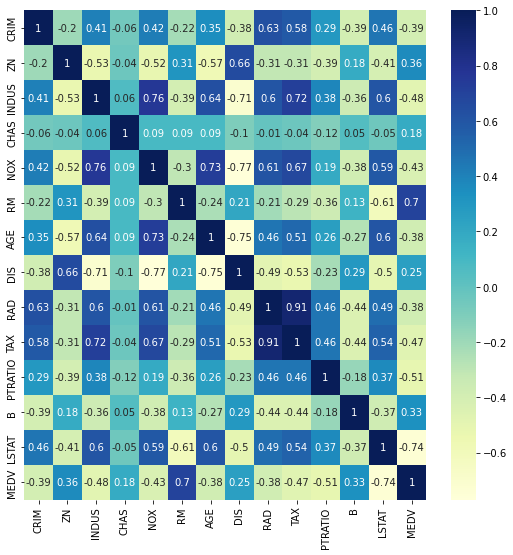

In [8]:
import seaborn as sns 

raw_data = pd.DataFrame(data=np.hstack([X,y]), columns=np.append(feature_names, 'MEDV'))
#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = raw_data.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()

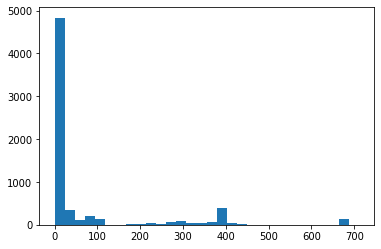

In [9]:
import matplotlib.pyplot as plt 
plt.hist(X.flatten(), bins=30); #독립변수 데이터분포 살펴보기

정규화를 통한 feature scaling 적용  
  
scaler을 하는 이유 각 독립변수간의 차이(높이)를 어느정도 맞춰두고 각 독립변수간의 중요도를 살펴보기 위해서 

In [10]:
from sklearn.preprocessing import MinMaxScaler      # 정규화를 통한 높이를 맞추는 함수를 임포트함.

minmax_scale = MinMaxScaler(feature_range=(0,5)).fit(X) #min:0, max:5
X_scaled = minmax_scale.transform(X) #feature scaling을 적용한 독립변수
X_scaled  

# X_scaled에 관한 수식 pdf에서 확인하기 

array([[0.00000000e+00, 9.00000000e-01, 3.39076246e-01, ...,
        1.43617021e+00, 5.00000000e+00, 4.48399558e-01],
       [1.17961270e-03, 0.00000000e+00, 1.21151026e+00, ...,
        2.76595745e+00, 5.00000000e+00, 1.02235099e+00],
       [1.17848872e-03, 0.00000000e+00, 1.21151026e+00, ...,
        2.76595745e+00, 4.94868627e+00, 3.17328918e-01],
       ...,
       [3.05946237e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 5.00000000e+00, 5.39459161e-01],
       [5.80364950e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 4.95650310e+00, 6.55353201e-01],
       [2.30920846e-03, 0.00000000e+00, 2.10227273e+00, ...,
        4.46808511e+00, 5.00000000e+00, 8.48509934e-01]])

데이터 분류 - 학습 데이터 및 테스트 데이터로 분류

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((354, 13), (152, 13), (354, 1), (152, 1))

((354, 13), (152, 13), (354, 1), (152, 1))

## Linear Regression with OLS Method

In [12]:
from sklearn.linear_model import LinearRegression       # 선형회귀를 위한 import        선형회귀 OLS:Ordinary Least Square

ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train) #학습데이터를 통하여 선형모델 생성

print('Coefficients: ', ols_reg.coef_)
print('Intercept: ', ols_reg.intercept_)

Coefficients:  [[-2.73628801  1.30031854 -0.1323611   0.32440662 -1.48715326  3.49878282
   0.21995085 -3.40487933  1.39215267 -1.28188776 -1.5256934   1.02718026
  -3.94915675]]
Intercept:  [25.4141332]


보기 쉽게 데이터 프레임으로 생성.

In [13]:
ols_df = pd.DataFrame(ols_reg.coef_, columns=feature_names) # columns 독립 변수 이름
ols_df.T

,0
CRIM,-2.736288
ZN,1.300319
INDUS,-0.132361
CHAS,0.324407
NOX,-1.487153
RM,3.498783
AGE,0.219951
DIS,-3.404879
RAD,1.392153
TAX,-1.281888


학습에서 얻어진 함수로 테스트데이터 예측 수행

In [14]:
y_pred_ols = ols_reg.predict(X_test) #테스트데이터로 예측수행 
y_pred_ols[:5]

array([[31.4243217 ],
       [31.96785487],
       [30.93785448],
       [22.34313349],
       [18.83846235]])

In [15]:
X_test[:5].dot(ols_reg.coef_.T) + ols_reg.intercept_ 

array([[31.4243217 ],
       [31.96785487],
       [30.93785448],
       [22.34313349],
       [18.83846235]])

여러가지 지표를 통한 성능평가 확인

In [16]:
#성능평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', round(mean_absolute_error(y_test,y_pred_ols),3))
print('MSE:', round(mean_squared_error(y_test,y_pred_ols),3)) 
print('RMSE:', round(mean_squared_error(y_test,y_pred_ols,squared=False),3))
print('R_Squared:', round(r2_score(y_test,y_pred_ols),3))

MAE: 3.707
MSE: 29.327
RMSE: 5.415
R_Squared: 0.7


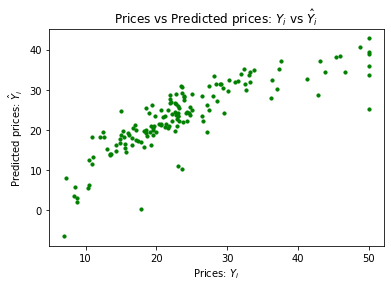

In [17]:
plt.scatter(y_test, y_pred_ols, s=10, c='green')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")     # $ $ 논문에서 사용하는 폰트 Latex
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

다중선형회귀 실습

## Ridge Regression

정규화 방법 중 L2 방법을 사용함.  
모든 feature 가 중요 할때 사용을 함

In [18]:
from sklearn.linear_model import Ridge      # Ridge 사이킷런       다중 선형회귀 
import numpy as np

# initialize
alphas = np.arange(0,200,1)     #행은 0, 199 총 200개 열은 feature_names의 개수
ridge_df = pd.DataFrame(np.zeros(shape=(len(alphas),len(feature_names))), columns=feature_names)

ridge_train_pred = []
ridge_test_pred = []
index_name = []

for i in range(len(alphas)):
    ridge_reg = Ridge(alpha=alphas[i])
    ridge_reg.fit(X_train, y_train)
    index_name.append('alpha' + str(alphas[i]))
    ridge_df.loc[i] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

ridge_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-2.736288,1.300319,-0.132361,0.324407,-1.487153,3.498783,0.219951,-3.404879,1.392153,-1.281888,-1.525693,1.027180,-3.949157
1,-2.669795,1.286358,-0.137828,0.328422,-1.464974,3.489538,0.217244,-3.359491,1.370263,-1.267282,-1.524189,1.025665,-3.941440
2,-2.606520,1.272912,-0.143224,0.332324,-1.443580,3.480066,0.214536,-3.315575,1.349217,-1.253200,-1.522733,1.024119,-3.933496
3,-2.546237,1.259950,-0.148550,0.336119,-1.422928,3.470391,0.211827,-3.273049,1.328962,-1.239612,-1.521321,1.022543,-3.925344
4,-2.488742,1.247447,-0.153805,0.339812,-1.402977,3.460536,0.209118,-3.231839,1.309448,-1.226491,-1.519948,1.020942,-3.917004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.529521,0.689594,-0.493122,0.511405,-0.511455,2.032041,-0.127365,-0.996811,0.322527,-0.631708,-1.279991,0.744165,-2.493512
196,-0.527657,0.688832,-0.493515,0.511363,-0.510435,2.027694,-0.128316,-0.992903,0.320643,-0.630956,-1.278734,0.743140,-2.488741
197,-0.525809,0.688074,-0.493903,0.511318,-0.509424,2.023366,-0.129261,-0.989021,0.318769,-0.630210,-1.277479,0.742118,-2.483990
198,-0.523976,0.687322,-0.494285,0.511270,-0.508423,2.019059,-0.130201,-0.985163,0.316904,-0.629469,-1.276226,0.741101,-2.479259


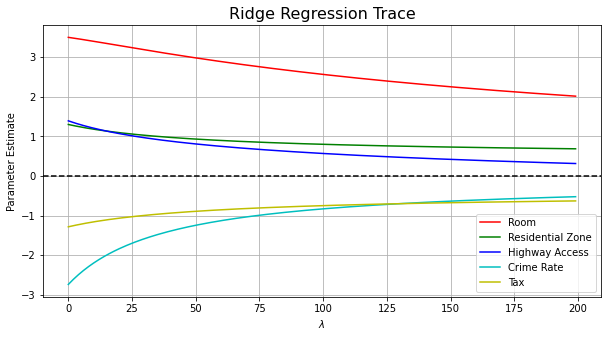

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Parameter Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True);

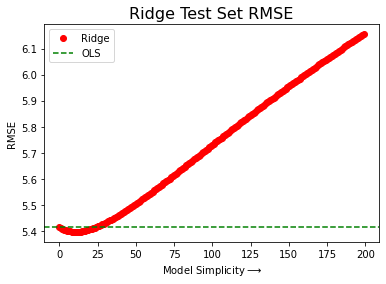

In [20]:
# 에러 값
ridge_rmse_test = [mean_squared_error(y_test, p, squared=False) for p in ridge_test_pred]
ols_rmse = mean_squared_error(y_test, y_pred_ols, squared=False)

# plot RMSE
plt.plot(ridge_rmse_test, 'ro')
plt.axhline(y=ols_rmse, color='g', linestyle='--')
plt.title("Ridge Test Set RMSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("RMSE")
plt.legend(['Ridge', 'OLS']);

여태까지 한건 Ridge(릿지)만 함.  
Lasso에 대해서 같은 방법으로 코드를 작성하여 총평을 자유롭게 작성해보기 
a4에다 해당 데이터에 관한 총평과
코드 및 리포트  
  
똑같은 방식으로 해보고 규제강도 0, 200, 1 이 있던 코드  
그 부분을 더 살펴보기 값이 바뀔 때의 회귀계수는 바뀜.  
  
  정규화를 하는 이유 너무 특별한 값이 있다면 오버피팅이 될수도 있기 떄문에 이것을 미리 방지하기 위해 정규화를 함. 정규화 방식은 L1, L2 Ridge, Lasso 방식이 있음.  
  ridge는 모든 값이 중요하다고 생각할 때,  
  어떤 값들은 제거 하고 싶을 때 Lasso(일부 변수 값을 제거함 즉 0으로 만듦)  
  그럼에도 불고하고 값이 이상하다면 시대적, 사회적인 변수를 넣지 못한 것을 충분히 고려해야함.


In [21]:
from sklearn.linear_model import Lasso      # Lasso 사이킷런       다중 선형회귀 
import numpy as np

# initialize
alphas = np.arange(0, 10, 1)     #행은 0, 199 총 200개 열은 feature_names의 개수
lasso_df = pd.DataFrame(np.zeros(shape=(len(alphas),len(feature_names))), columns=feature_names)

lasso_train_pred = []
lasso_test_pred = []
index_name = []

for i in range(len(alphas)):
    lasso_reg = Lasso(alpha=alphas[i])
    lasso_reg.fit(X_train, y_train)
    index_name.append('alpha' + str(alphas[i]))
    lasso_df.loc[i] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df






C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\vlrms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-2.736288,1.300319,-0.132361,0.324407,-1.487153,3.498783,0.219951,-3.404879,1.392153,-1.281888,-1.525693,1.027180,-3.949157
1,-0.000000,0.000000,-0.000000,0.000000,-0.000000,2.304006,-0.000000,-0.000000,-0.000000,-0.219967,-1.208162,0.354633,-3.924637
2,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.303409,-0.890881,0.000000,-3.964119
3,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.383809,-0.360159,0.000000,-3.066308
4,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.420532,-0.000000,0.000000,-2.132070
5,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.364905,-0.000000,0.000000,-1.121020
6,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.309288,-0.000000,0.000000,-0.109961
7,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
8,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
9,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


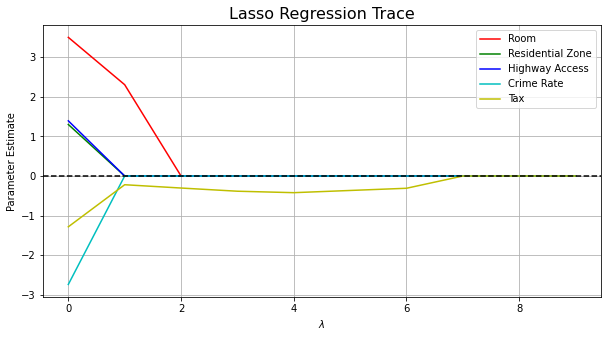

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("$\lambda$")
ax.set_ylabel("Parameter Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True);

In [23]:
# # 에러 값
# lasso_rmse_test = [mean_squared_error(y_test, p, squared=False) for p in lasso_test_pred]
# ols_rmse = mean_squared_error(y_test, y_pred_ols, squared=False)

# # plot RMSE
# plt.plot(lasso_rmse_test, 'ro')
# plt.axhline(y=ols_rmse, color='g', linestyle='--')
# plt.title("Lasso Test Set RMSE", fontsize=16)
# plt.xlabel("Model Simplicity$\longrightarrow$")
# plt.ylabel("RMSE")
# plt.legend(['Lasso', 'OLS']);

## 분류와 선형회귀

로지스틱회귀: 모든 값이 0과 1 사이의 값에 들어감.   
로지스틱 함수(시그모이드 함수)를 집어 넣으면 s-커브 함수가 나타남.   

<확률적>
따라서 로지스틱 함수가 0.7이 나왔다는 것은 확률이 70% 아닐 확률이 30%라는 뜻으로 해석 할수 있음.   
  
g(z)가 0 보다 같거나 큰 경우 y = 1  
g(z)가 0 보다 작은 경우 y = 0  
  


### 비용함수  파라미터 값을 찾기 위한 것.  
  
covex 로컬 미니멈이  
  
비용함수를 convex하게 만드는 것.  
y는 0 or 1 
  
 y1이면 0으로 갈수록 비용이 많이 들음.  
 y가0이면 1으로 갈수록 비용이 많이 들음.  
   



### 경사하강 회귀 계수를 수렴할떄 까지 업데이트 하는 것  
  
선형회귀와 경사하강과 동일해짐.  시그모이드가 있느냐 없느냐에만 따라 수식의 차이가 있을뿐 똑같음.  
  


최적화 알고리즘  
최적의 값을 적용하기 위한 알고리즘. 

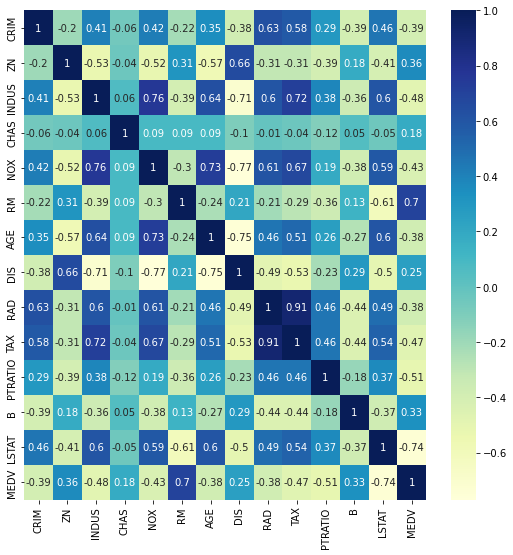

In [24]:
#### 비교 그래프

import seaborn as sns 

raw_data = pd.DataFrame(data=np.hstack([X,y]), columns=np.append(feature_names, 'MEDV'))
#correlation_matrix 판다스에서 기본 제공함.
correlation_matrix = raw_data.corr().round(2)
plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True, cmap='YlGnBu')
plt.show()